# 인공지능
## 1. Python_Data_Analytics_and_Visualization

### C. Data Preprocessing

#### III. 데이터프레임 합치기
##### 1) 데이터 프레임 TB1, TB2, TB3, TB4

In [1]:
import pandas as pd

TB1 = pd.DataFrame({'Name' : ['송태섭', '최유정', '이한나', '김소혜'],
                    'Gender': ['남자', '여자', '여자', '여자'],
                    'Age' : ['21', '23', '20', '23']})
            
TB1

,Name,Gender,Age
0,송태섭,남자,21
1,최유정,여자,23
2,이한나,여자,20
3,김소혜,여자,23


In [2]:
TB2 = pd.DataFrame({'Name': ['송태섭', '최유정', '이한나', '김소혜'],
                    'Gender': ['남자', '여자', '여자', '여자'],
                    'Height': [179.1, 177.1, 167.9, 176.1],
                    'Weight': [63.9, 54.9, 50.2, 53.5]})

TB2

,Name,Gender,Height,Weight
0,송태섭,남자,179.1,63.9
1,최유정,여자,177.1,54.9
2,이한나,여자,167.9,50.2
3,김소혜,여자,176.1,53.5


In [3]:
TB3 = pd.DataFrame({'Name': ['서태웅', '정대만'],
                    'Gender': ['남자', '남자'],
                    'Age': ['24', '24']})

TB3

,Name,Gender,Age
0,서태웅,남자,24
1,정대만,남자,24


In [4]:
TB4 = pd.DataFrame({'Grade': [3, 1, 1, 3],
                    'Picture': ['무', '유', '무', '무']})

TB4

,Grade,Picture
0,3,무
1,1,유
2,1,무
3,3,무


##### 2) concat()
* 행기준 axis = 0

In [5]:
pd.concat([TB1, TB2], axis=0)

,Name,Gender,Age,Height,Weight
0,송태섭,남자,21,NaN,NaN
1,최유정,여자,23,NaN,NaN
2,이한나,여자,20,NaN,NaN
3,김소혜,여자,23,NaN,NaN
0,송태섭,남자,NaN,179.1,63.9
1,최유정,여자,NaN,177.1,54.9
2,이한나,여자,NaN,167.9,50.2
3,김소혜,여자,NaN,176.1,53.5


In [6]:
pd.concat([TB1, TB2], axis=1)

,Name,Gender,Age,Name,Gender,Height,Weight
0,송태섭,남자,21,송태섭,남자,179.1,63.9
1,최유정,여자,23,최유정,여자,177.1,54.9
2,이한나,여자,20,이한나,여자,167.9,50.2
3,김소혜,여자,23,김소혜,여자,176.1,53.5


In [7]:
pd.concat([TB1, TB4], axis=1)

,Name,Gender,Age,Grade,Picture
0,송태섭,남자,21,3,무
1,최유정,여자,23,1,유
2,이한나,여자,20,1,무
3,김소혜,여자,23,3,무


In [8]:
pd.concat([TB1, TB3], axis=0, ignore_index=True)

,Name,Gender,Age
0,송태섭,남자,21
1,최유정,여자,23
2,이한나,여자,20
3,김소혜,여자,23
4,서태웅,남자,24
5,정대만,남자,24


##### 3) merge()

In [9]:
pd.merge(TB1, TB2, on = ['Name', 'Gender'])

,Name,Gender,Age,Height,Weight
0,송태섭,남자,21,179.1,63.9
1,최유정,여자,23,177.1,54.9
2,이한나,여자,20,167.9,50.2
3,김소혜,여자,23,176.1,53.5


#### IV. 그룹 연산
##### 1) 실습용 'titanic' 데이터셋

In [10]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
TD = titanic.loc[:, ['age', 'sex', 'class', 'fare', 'survived']]
TD.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


##### 2) groupby() - 'class' 기준

In [11]:
grouped = TD.groupby(['class'])
grouped

In [12]:
TD['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [13]:
grouped.get_group('First').head(3)

,age,sex,class,fare,survived
1,38.0,female,First,71.2833,1
3,35.0,female,First,53.1000,1
6,54.0,male,First,51.8625,0


In [14]:
for key in ['First', 'Second', 'Third']:
    print(grouped.get_group(key).head(3))
    print('\n')

    age     sex  class     fare  survived
1  38.0  female  First  71.2833         1
3  35.0  female  First  53.1000         1
6  54.0    male  First  51.8625         0


     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1


    age     sex  class   fare  survived
0  22.0    male  Third  7.250         0
2  26.0  female  Third  7.925         1
4  35.0    male  Third  8.050         0




In [15]:
grouped.mean()

C:\Users\jinre\AppData\Local\Temp\ipykernel_28024\2755795945.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped.mean()


,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


In [16]:
grouped.mean(numeric_only=True)

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


##### 3) groupby() - 'class' & 'sex' 기준

In [17]:
grouped_TWO = TD.groupby(['class', 'sex'])
grouped_TWO

In [18]:
grouped_TWO.get_group(('First', 'female')).head(3)

,age,sex,class,fare,survived
1,38.0,female,First,71.2833,1
3,35.0,female,First,53.1000,1
11,58.0,female,First,26.5500,1


In [19]:
for key, group in grouped_TWO:
    print('* key : ', key)
    print('* number : ', len(group))
    print(group.head())
    print('\n')

* key :  ('First', 'female')
* number :  94
     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1


* key :  ('First', 'male')
* number :  122
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0
30  40.0  male  First   27.7208         0
34  28.0  male  First   82.1708         0


* key :  ('Second', 'female')
* number :  76
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0
43   3.0  female  Second  41.5792         1
53  29.0  female  Second  26.0000         1


* key :  ('Second', 'male')
* number :  108
     age   sex   class  fare  survived

In [20]:
grouped_TWO.mean()

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

##### 4) agg()

In [21]:
grouped.agg(['mean', 'std'])

C:\Users\jinre\AppData\Local\Temp\ipykernel_28024\3943835241.py:1: FutureWarning: ['sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped.agg(['mean', 'std'])


age                  fare             survived          
             mean        std       mean        std      mean       std
class                                                                 
First   38.233441  14.802856  84.154687  78.380373  0.629630  0.484026
Second  29.877630  14.001077  20.662183  13.417399  0.472826  0.500623
Third   25.140620  12.495398  13.675550  11.778142  0.242363  0.428949

In [22]:
grouped_TWO.agg(['mean', 'std'])

age                   fare             survived          
                    mean        std        mean        std      mean       std
class  sex                                                                    
First  female  34.611765  13.612052  106.125798  74.259988  0.968085  0.176716
       male    41.281386  15.139570   67.226127  77.548021  0.368852  0.484484
Second female  28.722973  12.872702   21.970121  10.891796  0.921053  0.271448
       male    30.740707  14.793894   19.741782  14.922235  0.157407  0.365882
Third  female  21.750000  12.729964   16.118810  11.690314  0.500000  0.501745
       male    26.507589  12.159514   12.661633  11.681696  0.135447  0.342694

In [23]:
grouped.fare.agg(['min', 'max'])

,min,max
class,,
First,0.0,512.3292
Second,0.0,73.5000
Third,0.0,69.5500


In [24]:
grouped['fare'].agg(['min', 'max'])

,min,max
class,,
First,0.0,512.3292
Second,0.0,73.5000
Third,0.0,69.5500


In [25]:
grouped.agg({'fare' : ['min', 'max'], 'age' : ['mean', 'std']})

fare                  age           
        min       max       mean        std
class                                      
First   0.0  512.3292  38.233441  14.802856
Second  0.0   73.5000  29.877630  14.001077
Third   0.0   69.5500  25.140620  12.495398

##### 5) filter()

In [26]:
grouped.filter(lambda x : len(x) >= 200).head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [27]:
grouped.apply(len)

class
First     216
Second    184
Third     491
dtype: int64

In [28]:
grouped.filter(lambda x : x.age.mean() < 30).tail()

,age,sex,class,fare,survived
884,25.0,male,Third,7.050,0
885,39.0,female,Third,29.125,0
886,27.0,male,Second,13.000,0
888,NaN,female,Third,23.450,0
890,32.0,male,Third,7.750,0


In [29]:
grouped.age.mean()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

#### V. pivot_table()
##### 1) 실습용 'titanic' 데이터셋

In [30]:
import seaborn as sns 
titanic = sns.load_dataset('titanic')

TD = titanic.loc[:, ['age', 'sex', 'class', 'fare', 'survived']]

TD.head(3)

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1


##### 2) pivot_table()

In [31]:
TD_1 = pd.pivot_table(TD, index = 'class', columns = 'sex', values = 'age', aggfunc = 'mean')
TD_1

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


##### 3) 두개의 적용 함수

In [32]:
TD_2 = pd.pivot_table(TD, 
                     index = 'class',
                     columns = 'sex',
                     values = 'survived',
                     aggfunc = ['mean', 'sum'])

TD_2

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

##### 4) 다중 인덱스, 다중 데이터, 다중 함수

In [33]:
TD_3 = pd.pivot_table(TD,
                     index = ['class', 'sex'],
                     columns = 'survived',
                     values = ['age','fare'],
                     aggfunc = {'age' : ['mean', 'std'], 'fare' : ['min', 'max']})

TD_3

age                                     fare            \
                    mean                   std                max             
survived               0          1          0          1       0         1   
class  sex                                                                    
First  female  25.666667  34.939024  24.006943  13.223014  151.55  512.3292   
       male    44.581967  36.248000  14.457749  14.936744  263.00  512.3292   
Second female  36.000000  28.080882  12.915107  12.764693   26.00   65.0000   
       male    33.369048  16.022000  12.158125  19.547122   73.50   39.0000   
Third  female  23.818182  19.329787  12.833465  12.303246   69.55   31.3875   
       male    27.255814  22.274211  12.135707  11.555786   69.55   56.4958   

                                 
                   min           
survived             0        1  
class  sex                       
First  female  28.7125  25.9292  
       male     0.0000  26.2875  
Second female  10.5000  10.5000  
       male     0.0000  10.5000  
Third  female   6.7500   7.2250  
       male     0.0000   0.0000

#### VI. Multi-Index
##### 1) 행 멀티 인덱스

In [34]:
TD_3.index

MultiIndex([( 'First', 'female'),
            ( 'First',   'male'),
            ('Second', 'female'),
            ('Second',   'male'),
            ( 'Third', 'female'),
            ( 'Third',   'male')],
           names=['class', 'sex'])

In [35]:
TD_3.xs('First', level ='class', axis = 0)

age                                     fare            \
               mean                   std                max             
survived          0          1          0          1       0         1   
sex                                                                      
female    25.666667  34.939024  24.006943  13.223014  151.55  512.3292   
male      44.581967  36.248000  14.457749  14.936744  263.00  512.3292   

                            
              min           
survived        0        1  
sex                         
female    28.7125  25.9292  
male       0.0000  26.2875

In [36]:
TD_3.xs('male', level = 'sex', axis = 0)

age                                     fare                 \
               mean                   std                max            min   
survived          0          1          0          1       0         1    0   
class                                                                         
First     44.581967  36.248000  14.457749  14.936744  263.00  512.3292  0.0   
Second    33.369048  16.022000  12.158125  19.547122   73.50   39.0000  0.0   
Third     27.255814  22.274211  12.135707  11.555786   69.55   56.4958  0.0   

                   
                   
survived        1  
class              
First     26.2875  
Second    10.5000  
Third      0.0000

In [37]:
TD_3.xs(('First', 'male'), level = ['class', 'sex'], axis = 0)

age                                 fare                 \
                 mean                std               max            min   
survived            0       1          0          1      0         1    0   
class sex                                                                   
First male  44.581967  36.248  14.457749  14.936744  263.0  512.3292  0.0   

                     
                     
survived          1  
class sex            
First male  26.2875

#### VII. etc
##### 1) 실습용 'titanic' 데이터셋

In [38]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
TD = titanic.loc[:, ['age', 'sex', 'class', 'fare', 'survived']]
TD.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [39]:
TD['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [40]:
TD[['sex', 'class']].value_counts()

sex     class 
male    Third     347
female  Third     144
male    First     122
        Second    108
female  First      94
        Second     76
dtype: int64

In [41]:
TD['sex'].nunique()

2

In [42]:
TD[['sex', 'class']].nunique()

sex      2
class    3
dtype: int64

In [43]:
TD.loc[[0, 4], :]

,age,sex,class,fare,survived
0,22.0,male,Third,7.25,0
4,35.0,male,Third,8.05,0


In [44]:
TD['sex'] = TD['sex'].replace('male', 'MAN')

In [45]:
TD.loc[TD['sex'] == 'MAN', :][:2]

,age,sex,class,fare,survived
0,22.0,MAN,Third,7.25,0
4,35.0,MAN,Third,8.05,0


### D. matplotlib

* 실습파일 구성

In [46]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jinred9/pyData/master/PII.csv'
DF = pd.read_csv(url)
DF.head()

,Name,Gender,Age,Grade,Picture,BloodType,Height,Weight
0,송태섭,남자,21,3,무,B,179.1,63.9
1,최유정,여자,23,1,유,A,177.1,54.9
2,이한나,여자,20,1,무,A,167.9,50.2
3,김소혜,여자,23,3,무,O,176.1,53.5
4,서태웅,남자,24,4,무,B,176.1,79.8


* matplotlib Package

In [47]:
import matplotlib.pyplot as plt

#### I. 선 그래프

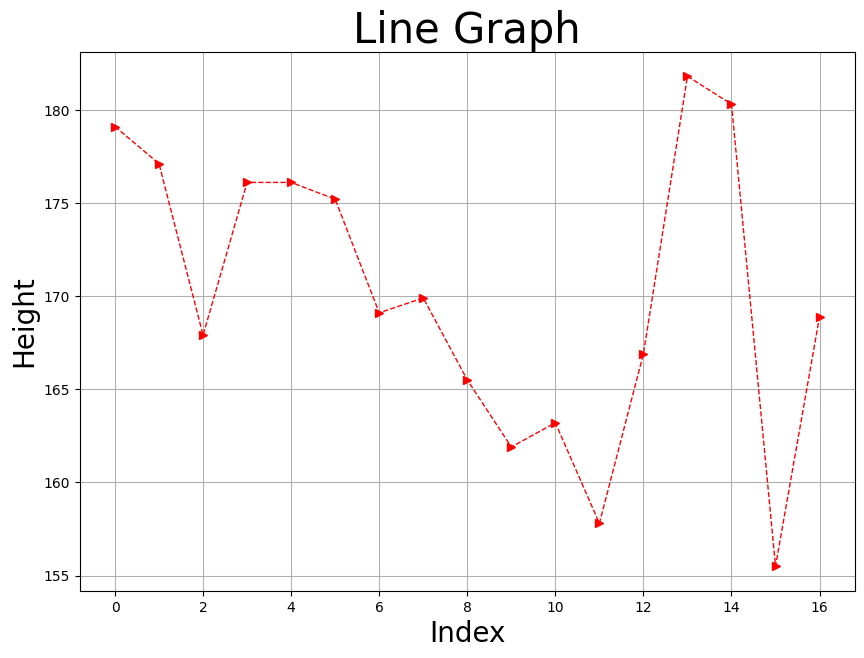

In [48]:
plt.figure(figsize = (10, 7))
plt.plot(DF.Height,
        linewidth = 1,
        color = 'r',
        marker = '>',
        linestyle = '--')
plt.title('Line Graph', size = 30)
plt.xlabel('Index', size = 20)
plt.ylabel('Height', size = 20)
plt.grid(True)
plt.show()

#### II. 막대 그래프

##### 1) bar()

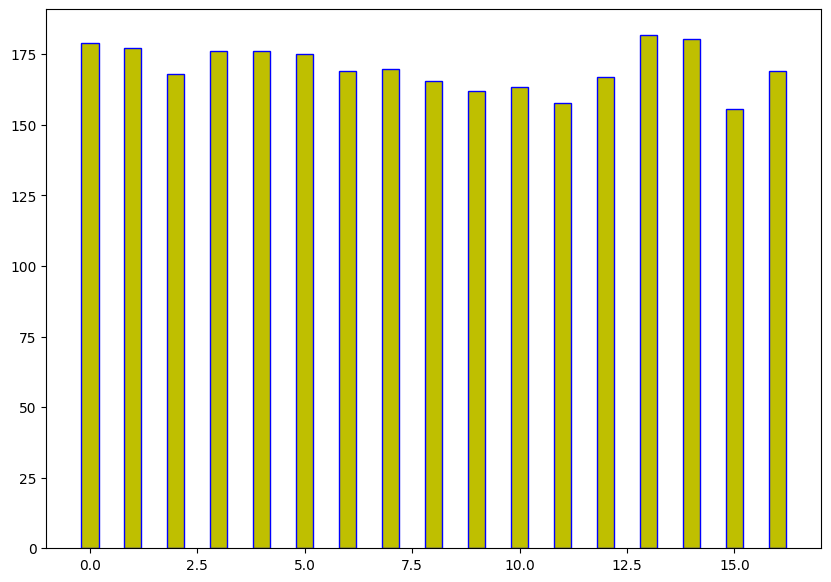

In [49]:
plt.figure(figsize = (10, 7))
plt.bar(DF.index,
        DF.Height,
        width = 0.4,
        color = 'y',
        # label = 'Height',
        edgecolor = 'b')
# plt.legend()
plt.show()

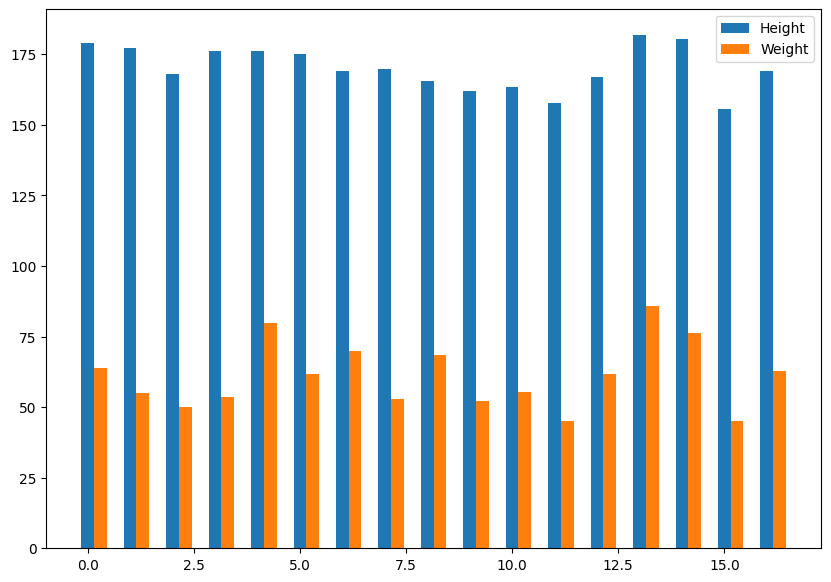

In [50]:
plt.figure(figsize = (10, 7))
plt.bar(DF.index, DF['Height'],
        width = 0.3, label = 'Height')
plt.bar(DF.index + 0.3, DF['Weight'],
        width = 0.3, label = 'Weight')
plt.legend()
plt.show()

##### 2) barh()

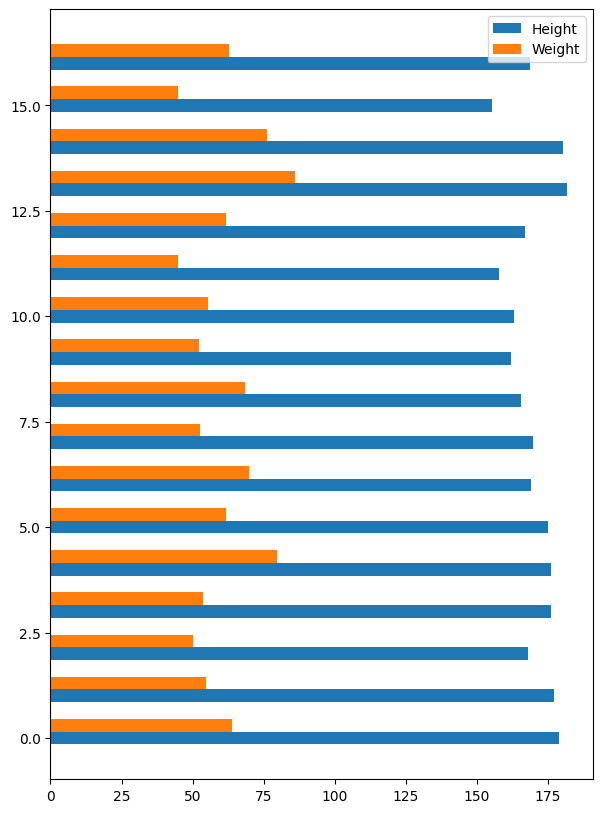

In [51]:
plt.figure(figsize = (7, 10))

plt.barh(DF.index, 
         width = DF['Height'], height = 0.3,
         label = 'Height')
plt.barh(DF.index + 0.3, 
         width = DF['Weight'], height = 0.3, 
         label = 'Weight')

plt.legend()
plt.show()

#### III. 히스토그램

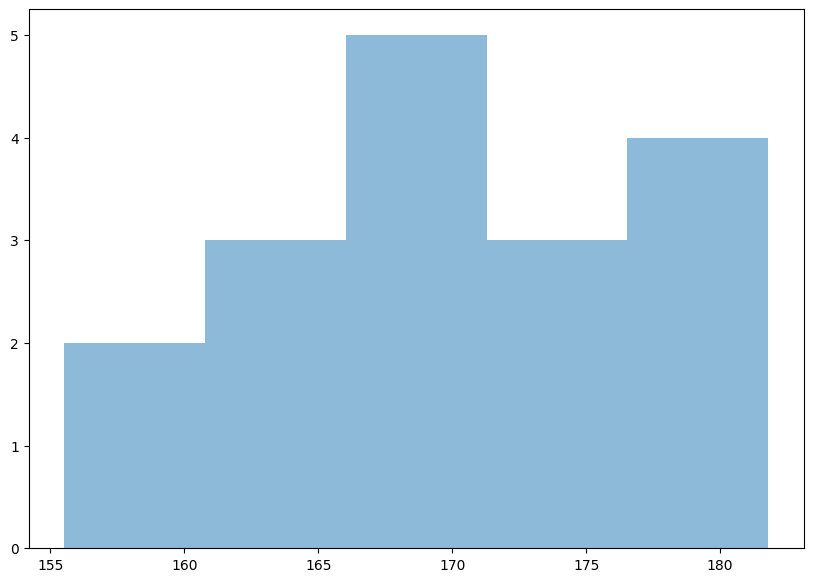

In [52]:
plt.figure(figsize = (10, 7))
plt.hist(DF.Height, bins = 5, alpha = 0.5, density = False)
plt.show()

#### IV. 상자그래프

##### 1) 전체 키 분포

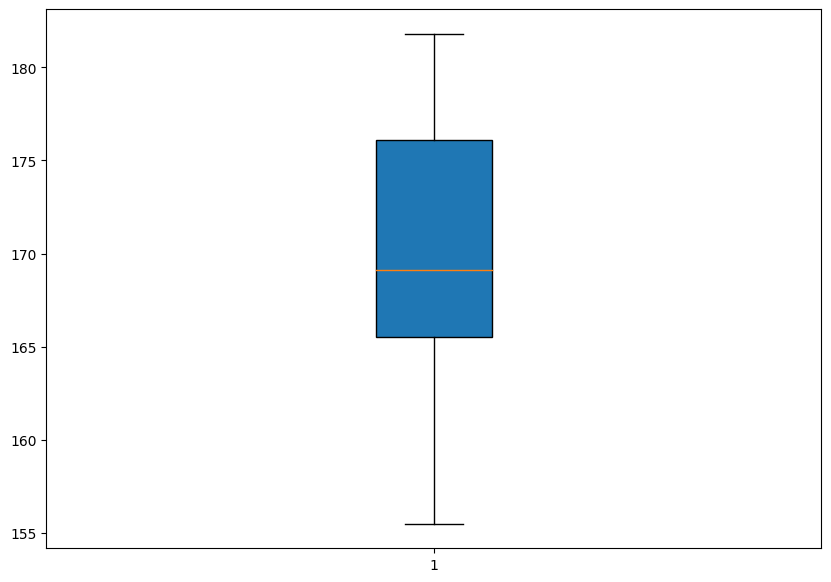

In [53]:
plt.figure(figsize = (10, 7))
plt.boxplot(DF.Height, patch_artist = True)
plt.show()

##### 2) 형액형별 키분포

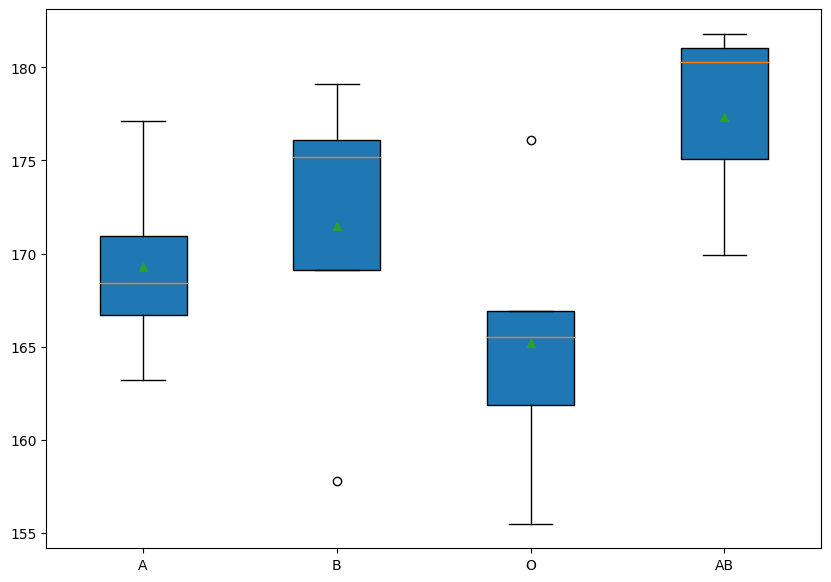

In [54]:
plt.figure(figsize = (10, 7))
plt.boxplot([DF.loc[DF['BloodType'] == 'A', 'Height'],
             DF.loc[DF['BloodType'] == 'B', 'Height'],
             DF.loc[DF['BloodType'] == 'O', 'Height'],
             DF.loc[DF['BloodType'] == 'AB', 'Height']],
             labels = ['A', 'B', 'O', 'AB'],
             patch_artist = True,
             showmeans = True)
plt.show()

#### V. 산점도

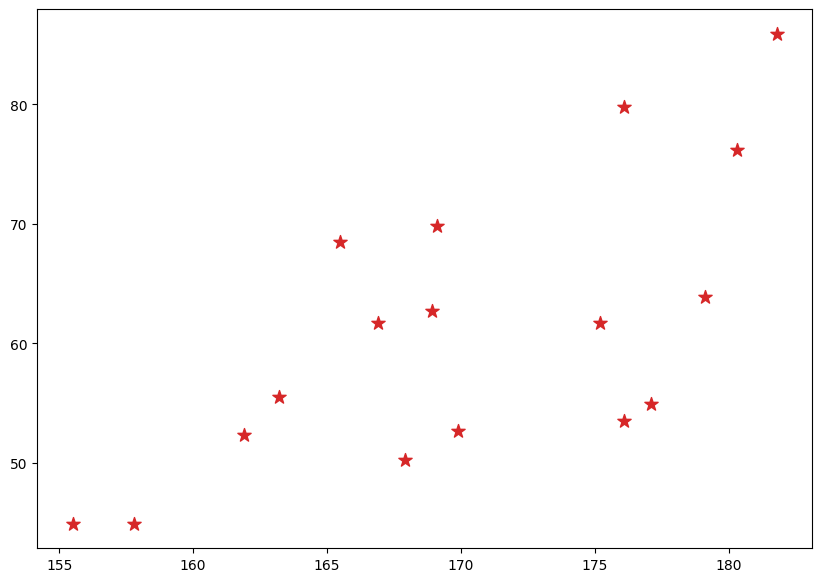

In [55]:
plt.figure(figsize = (10, 7))
plt.scatter(DF.Height, DF.Weight, marker = '*', s = 100, c = '#d62728')
plt.show()

#### VI. 파이 그래프

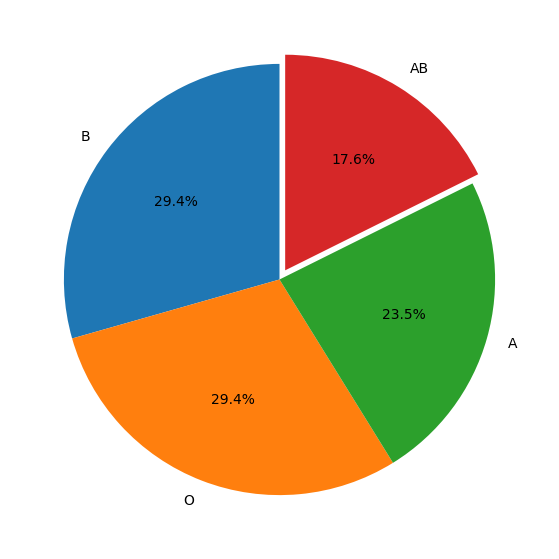

In [56]:
plt.figure(figsize = (10, 7))
plt.pie(DF.BloodType.value_counts(),
        labels = DF.BloodType.value_counts().index,
        autopct = '%.1f%%',
        explode = [0.0, 0.0, 0.0, 0.05],
        startangle = 90)
plt.show()

#### VII. plt.subplot()

##### 1) Figure

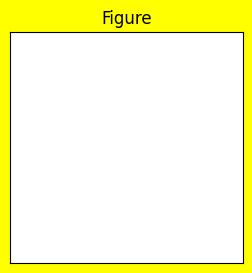

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize = (3, 3), facecolor = 'yellow')
plt.title('Figure')
plt.xticks([])
plt.yticks([])
plt.plot()
plt.show()

##### 2) Axes

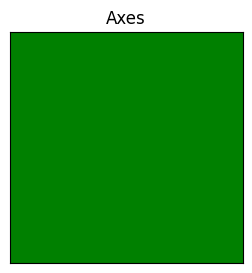

In [58]:
ax = plt.axes(facecolor = 'g')
ax.figure.set_size_inches(3, 3)
ax.set_title('Axes')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

##### 3) 1 x 2 subplot

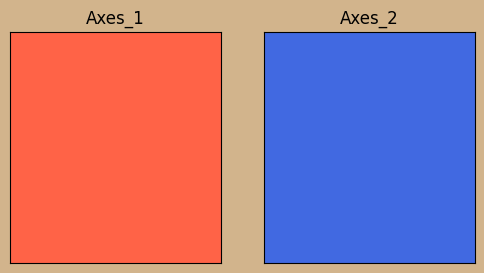

In [59]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 3), facecolor = 'tan')

ax[0].plot()
ax[0].set_facecolor('tomato')
ax[0].set_title('Axes_1')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].plot()
ax[1].set_facecolor('royalblue')
ax[1].set_title('Axes_2')
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

##### 4) 2 x 1 subplot

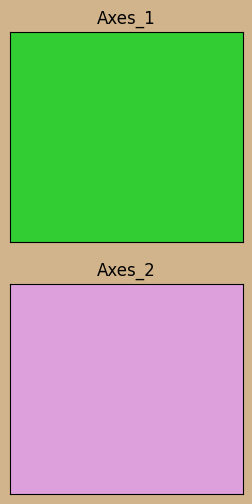

In [60]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (3, 6), facecolor = 'tan')

ax[0].plot()
ax[0].set_facecolor('limegreen')
ax[0].set_title('Axes_1')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].plot()
ax[1].set_facecolor('plum')
ax[1].set_title('Axes_2')
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

##### 5) 2 x 2 subplot

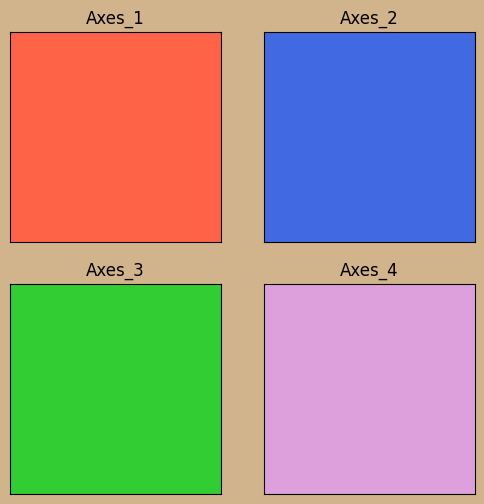

In [61]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (6, 6), facecolor = 'tan')

ax[0, 0].plot()
ax[0, 0].set_facecolor('tomato')
ax[0, 0].set_title('Axes_1')
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])

ax[0, 1].plot()
ax[0, 1].set_facecolor('royalblue')
ax[0, 1].set_title('Axes_2')
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])

ax[1, 0].plot()
ax[1, 0].set_facecolor('limegreen')
ax[1, 0].set_title('Axes_3')
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])

ax[1, 1].plot()
ax[1, 1].set_facecolor('plum')
ax[1, 1].set_title('Axes_4')
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])

plt.show()

#### VII. Examples
##### 1) Histograms

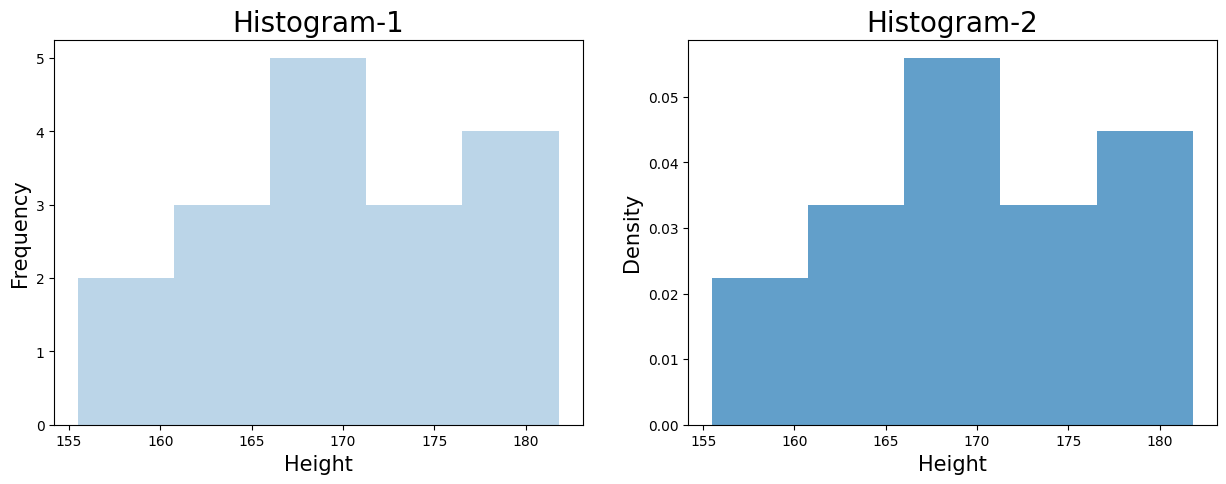

In [62]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

ax[0].hist(DF.Height, 
           bins = 5, alpha = 0.3, 
           density = False)
ax[1].hist(DF.Height, 
           bins = 5, alpha = 0.7, 
           density = True)

ax[0].set_title('Histogram-1', size = 20)
ax[1].set_title('Histogram-2', size = 20)

ax[0].set_xlabel('Height', size = 15)
ax[1].set_xlabel('Height', size = 15)

ax[0].set_ylabel('Frequency', size = 15)
ax[1].set_ylabel('Density', size = 15)

plt.show()

##### 2) Multiple plots

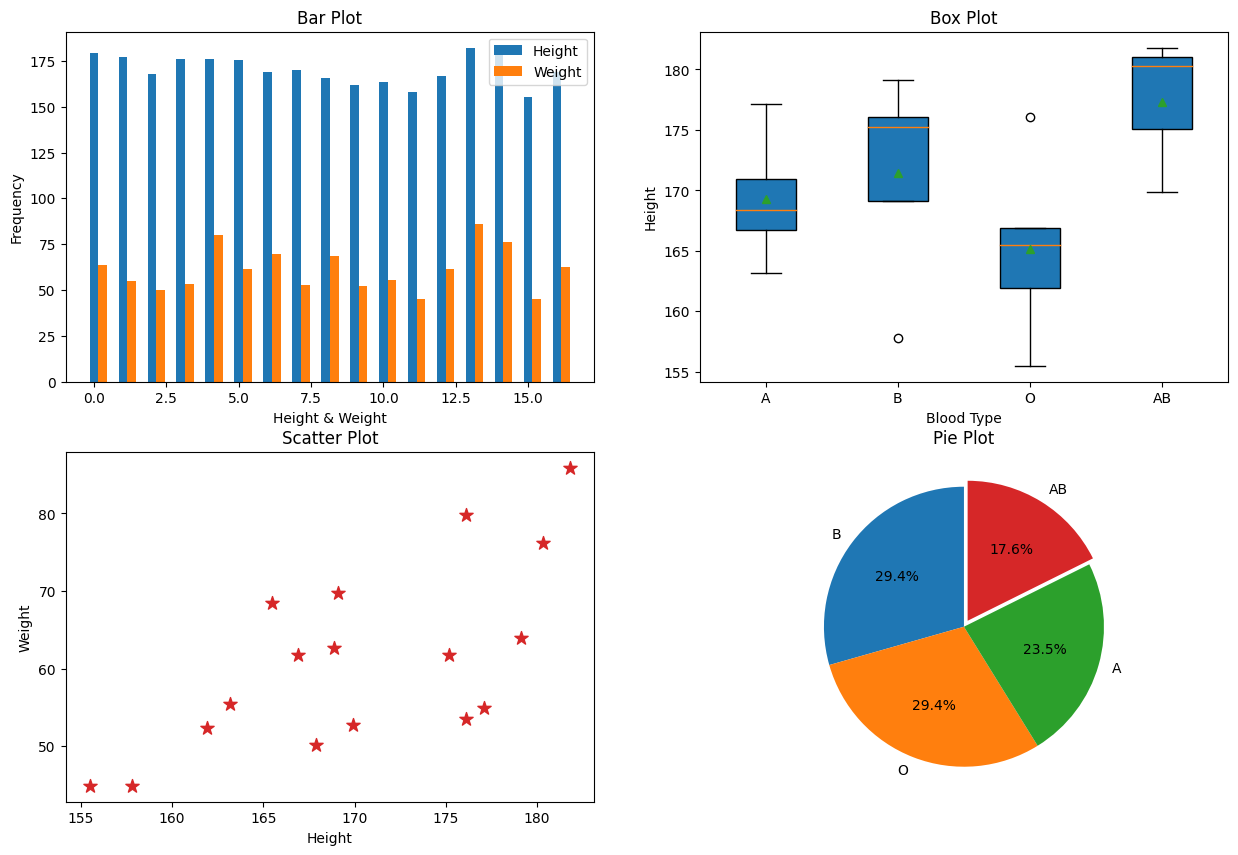

In [63]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

ax[0, 0].bar(DF.index, DF['Height'], width = 0.3, label = 'Height')
ax[0, 0].bar(DF.index + 0.3, DF['Weight'], width = 0.3, label = 'Weight')

ax[0, 1].boxplot([DF.loc[DF['BloodType'] == 'A', 'Height'],
                  DF.loc[DF['BloodType'] == 'B', 'Height'],
                  DF.loc[DF['BloodType'] == 'O', 'Height'],
                  DF.loc[DF['BloodType'] == 'AB', 'Height']],
                  labels = ['A', 'B', 'O', 'AB'], patch_artist = True, 
                 showmeans = True)

ax[1, 0].scatter(DF.Height, DF.Weight, 
                 marker='*', s = 100, c = '#d62728')

ax[1, 1].pie(DF.BloodType.value_counts(),
             labels = DF.BloodType.value_counts().index,
             autopct = '%.1f%%', startangle = 90,
             explode = [0.0, 0.0, 0.0, 0.05])

ax[0, 0].legend()

ax[0, 0].set_title('Bar Plot')
ax[0, 1].set_title('Box Plot')
ax[1, 0].set_title('Scatter Plot')
ax[1, 1].set_title('Pie Plot')

ax[0, 0].set_xlabel('Height & Weight')
ax[0, 1].set_xlabel('Blood Type')
ax[1, 0].set_xlabel('Height')
ax[1, 1].set_xlabel('')

ax[0, 0].set_ylabel('Frequency')
ax[0, 1].set_ylabel('Height')
ax[1, 0].set_ylabel('Weight')
ax[1, 1].set_ylabel('')

plt.show()

### E. seaborn

* 실습파일 구성

In [64]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jinred9/pyData/master/PII.csv'
DF = pd.read_csv(url)
DF.head()

,Name,Gender,Age,Grade,Picture,BloodType,Height,Weight
0,송태섭,남자,21,3,무,B,179.1,63.9
1,최유정,여자,23,1,유,A,177.1,54.9
2,이한나,여자,20,1,무,A,167.9,50.2
3,김소혜,여자,23,3,무,O,176.1,53.5
4,서태웅,남자,24,4,무,B,176.1,79.8


* seaborn Package

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

##### I. 선그래프

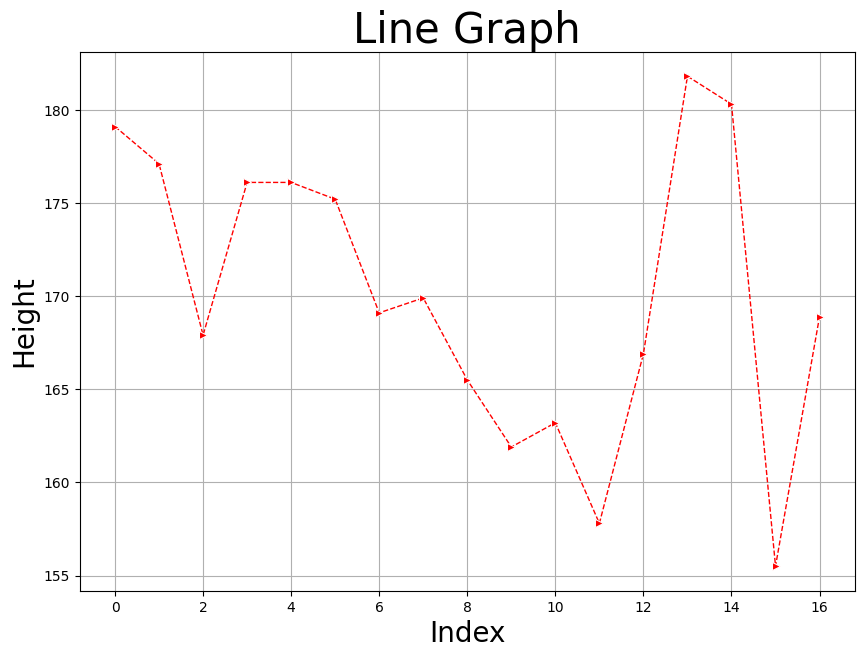

In [66]:
plt.figure(figsize = (10, 7))
sns.lineplot(x = DF.index,
             y = DF.Height,
             linewidth = 1,
             color = 'r',
             marker = '>',
             linestyle = '--')
plt.title('Line Graph', size = 30)
plt.xlabel('Index', size = 20)
plt.ylabel('Height', size = 20)
plt.grid(True)
plt.show()

#### II. 막대그래프
##### 1) 연속형 - barplot()

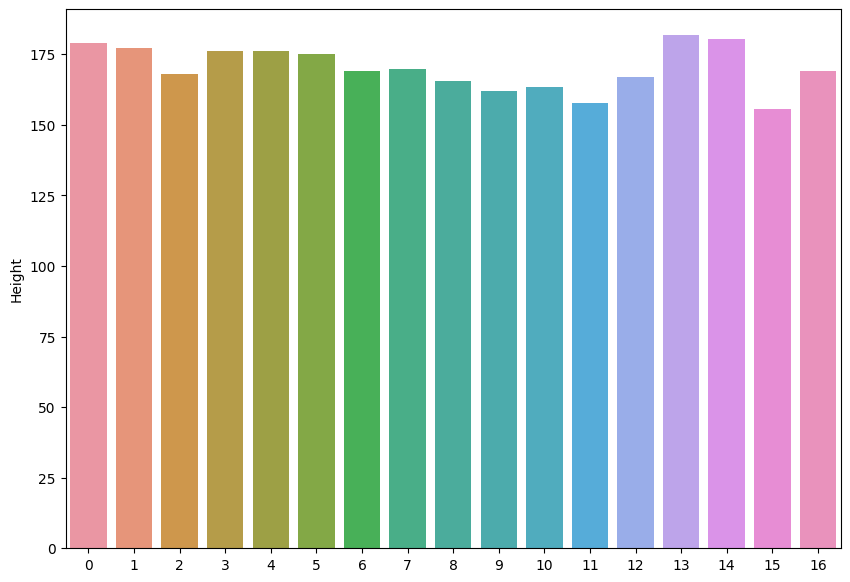

In [67]:
plt.figure(figsize = (10, 7))
sns.barplot(data = DF,
            x = DF.index,
            y = 'Height')
plt.show()

##### 2) 명목형 - countplot()

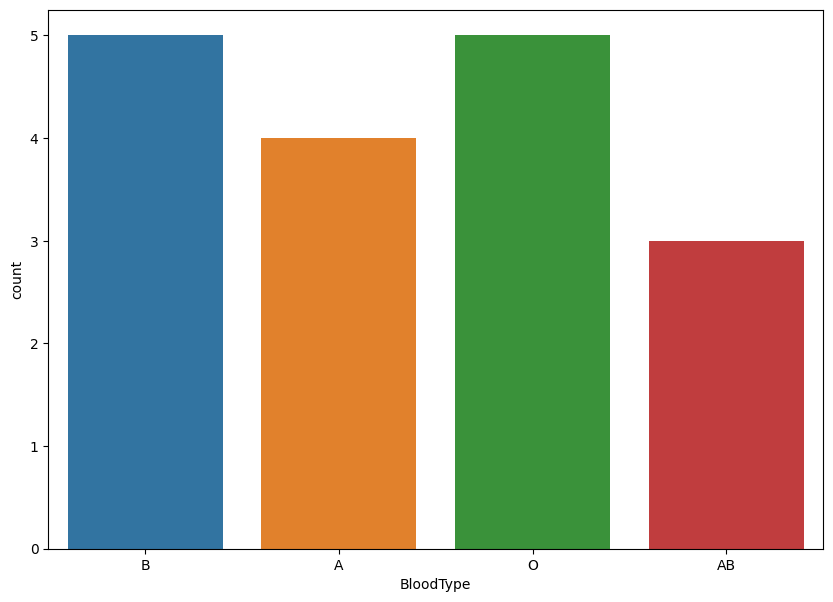

In [68]:
plt.figure(figsize=(10, 7))
sns.countplot(data=DF,
              x = 'BloodType')
plt.show()

C:\Users\jinre\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jinre\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jinre\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


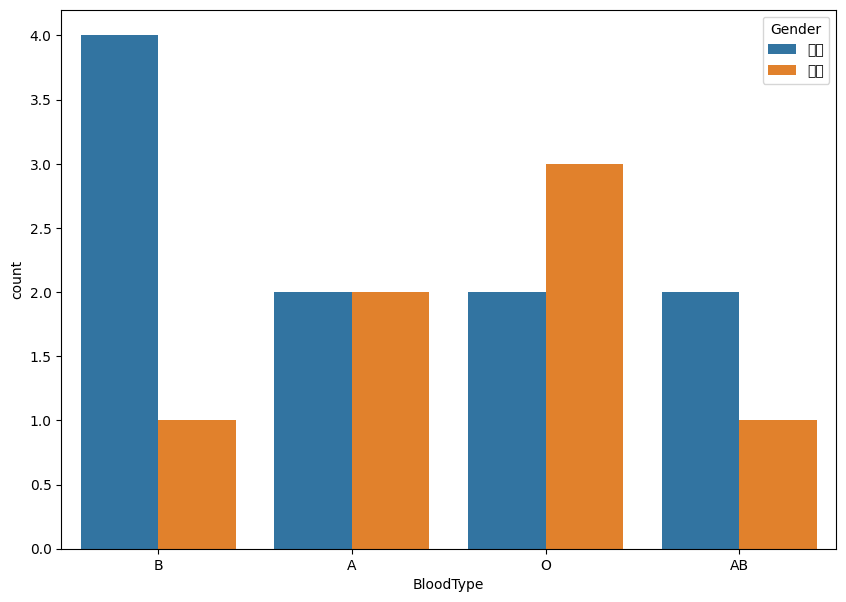

In [69]:
plt.figure(figsize = (10, 7))
sns.countplot(data = DF,
              x = 'BloodType',
              hue = 'Gender')
plt.show()

C:\Users\jinre\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jinre\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jinre\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


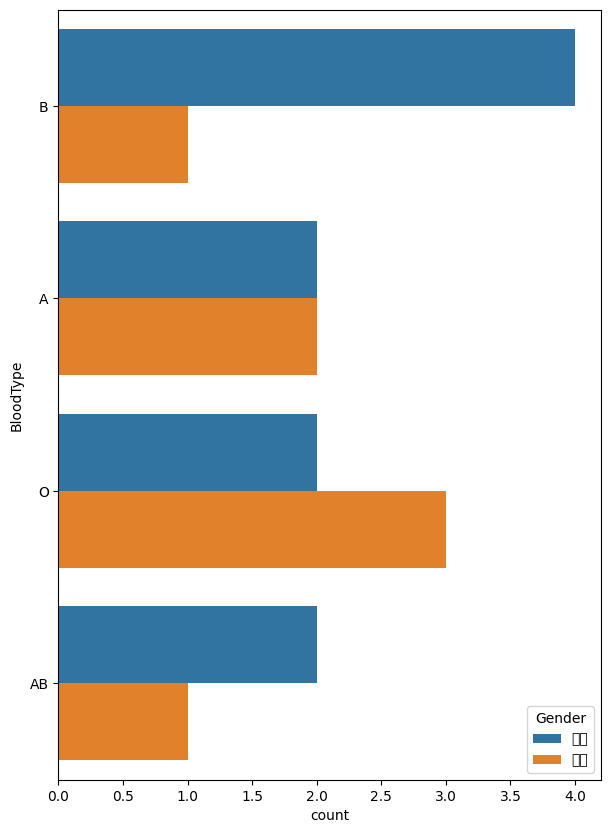

In [70]:
plt.figure(figsize = (7, 10))
sns.countplot(data = DF,
              y = 'BloodType',
              hue = 'Gender')
plt.show()

#### III. 히스토그램

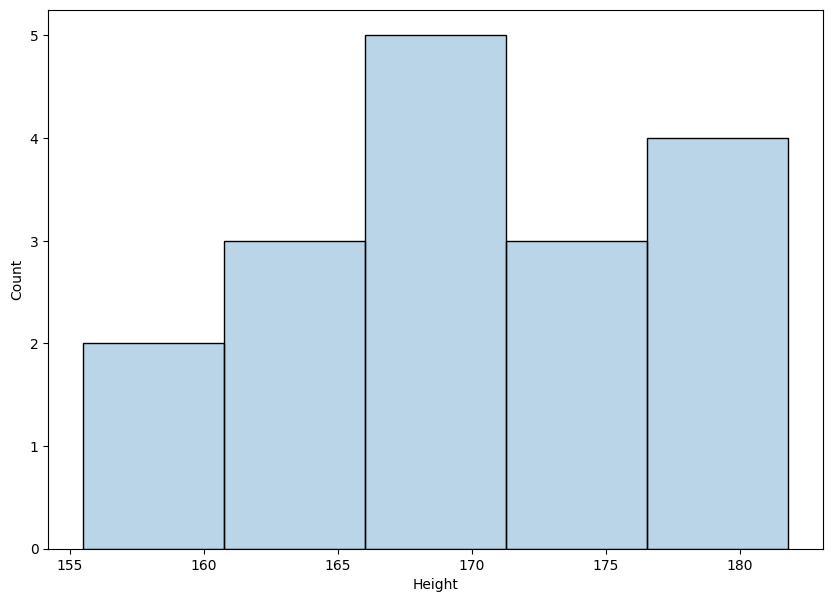

In [74]:
plt.figure(figsize = (10, 7))
sns.histplot(data = DF,
             x = 'Height',
             bins = 5, 
             alpha = 0.3)
plt.show()

#### IV. 상자 그래프

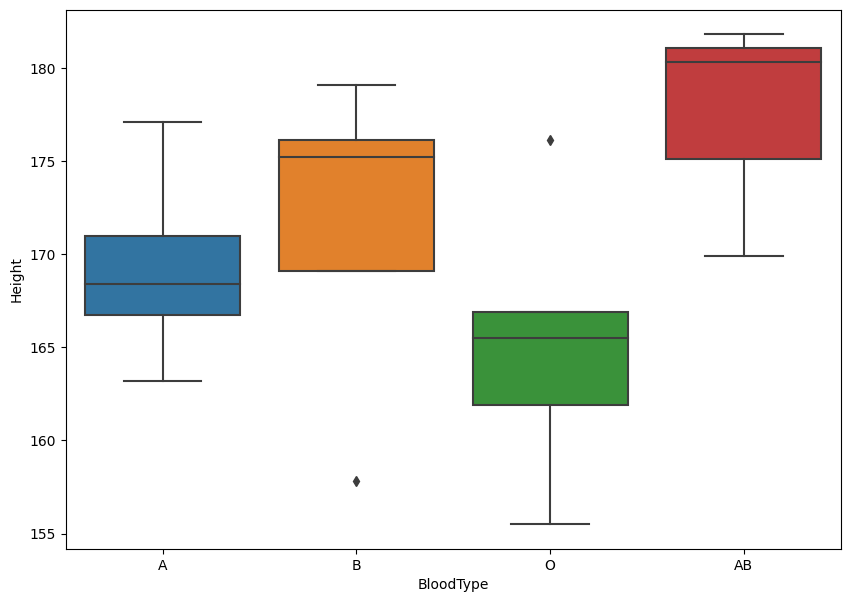

In [75]:
plt.figure(figsize = (10, 7))
sns.boxplot(data = DF,
            x = 'BloodType', 
            y = 'Height',
            order = ['A', 'B', 'O', 'AB'])
plt.show()

#### V. 산점도

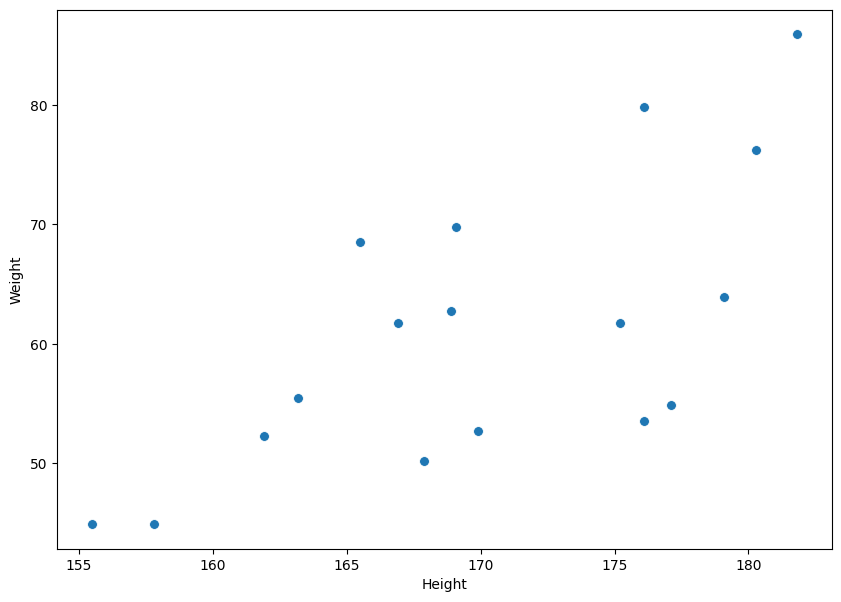

In [76]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data = DF,
                x = 'Height', 
                y = 'Weight', 
                s = 50)
plt.show()

#### VI. 바이올린 그래프

C:\Users\jinre\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jinre\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jinre\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


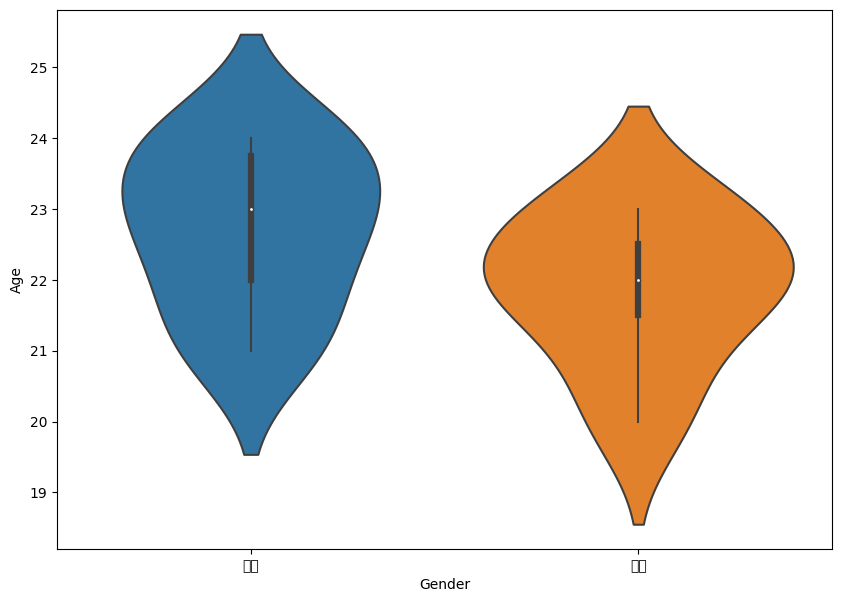

In [77]:
plt.figure(figsize = (10, 7))
sns.violinplot(data = DF,
               x = 'Gender',
               y = 'Age')
plt.show()

#### VII. Historams

C:\Users\jinre\AppData\Local\Temp\ipykernel_28024\4226005190.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = DF['Height'],


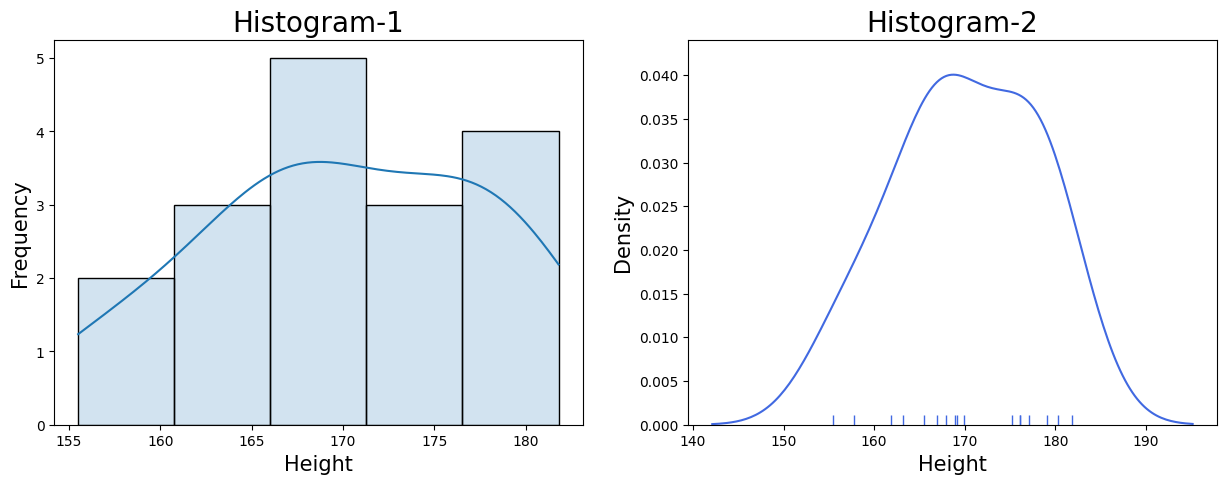

In [78]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.histplot(data = DF, x = 'Height',
             bins = 5, alpha = 0.2,
             kde = True, ax = ax[0])
sns.distplot(x = DF['Height'],
             bins = 5, kde = True, color = 'royalblue',
             hist = False, rug = True, ax = ax[1])

ax[0].set_title('Histogram-1', size = 20)
ax[1].set_title('Histogram-2', size = 20)

ax[0].set_xlabel('Height', size = 15)
ax[1].set_xlabel('Height', size = 15)

ax[0].set_ylabel('Frequency', size = 15)
ax[1].set_ylabel('Density', size = 15)

plt.show()